# SIR Model

## Name: Rohit Dev

In [1]:
# Import libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import missingno as msno
import plotly.graph_objects as go

from datetime import datetime

In [2]:
%matplotlib inline
sns.set(style='darkgrid')
mpl.rcParams['figure.figsize'] = (16,9)
pd.set_option('display.max_rows', 500)

In [3]:
# SIR Model is being for shown 3 countries
country_list = ['Germany', 'India', 'Spain']

In [4]:
# Import raw data
raw_data=pd.read_csv('../data/raw/owid-covid-data.csv')

In [5]:
# display raw data
raw_data.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN


In [6]:
# Store the country list
country_list = raw_data['location'].unique()

In [7]:
# Import the processed data
data_analysis = pd.read_csv('../data/processed/processed_data.csv')
data_analysis.set_index(['date'], inplace=True)

In [8]:
# Sort the infected cases for all countries in separate data frame
data_infected= pd.DataFrame(data_analysis.index)
data_infected.set_index(['date'], inplace=True)

In [9]:
for each in country_list:
    data_infected[each] = pd.DataFrame(data_analysis[each])

C:\Users\DigiBau\AppData\Local\Temp\ipykernel_9588\1569260132.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data_infected[each] = pd.DataFrame(data_analysis[each])
C:\Users\DigiBau\AppData\Local\Temp\ipykernel_9588\1569260132.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data_infected[each] = pd.DataFrame(data_analysis[each])
C:\Users\DigiBau\AppData\Local\Temp\ipykernel_9588\1569260132.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which ha

C:\Users\DigiBau\AppData\Local\Temp\ipykernel_9588\1569260132.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data_infected[each] = pd.DataFrame(data_analysis[each])
C:\Users\DigiBau\AppData\Local\Temp\ipykernel_9588\1569260132.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data_infected[each] = pd.DataFrame(data_analysis[each])
C:\Users\DigiBau\AppData\Local\Temp\ipykernel_9588\1569260132.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which ha

C:\Users\DigiBau\AppData\Local\Temp\ipykernel_9588\1569260132.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data_infected[each] = pd.DataFrame(data_analysis[each])
C:\Users\DigiBau\AppData\Local\Temp\ipykernel_9588\1569260132.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data_infected[each] = pd.DataFrame(data_analysis[each])
C:\Users\DigiBau\AppData\Local\Temp\ipykernel_9588\1569260132.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which ha

C:\Users\DigiBau\AppData\Local\Temp\ipykernel_9588\1569260132.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data_infected[each] = pd.DataFrame(data_analysis[each])
C:\Users\DigiBau\AppData\Local\Temp\ipykernel_9588\1569260132.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data_infected[each] = pd.DataFrame(data_analysis[each])
C:\Users\DigiBau\AppData\Local\Temp\ipykernel_9588\1569260132.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which ha

In [10]:
data_infected.tail()

,Afghanistan,Africa,Albania,Algeria,Andorra,Angola,Anguilla,Antigua and Barbuda,Argentina,Armenia,...,Vanuatu,Vatican,Venezuela,Vietnam,Wallis and Futuna,Western Sahara,World,Yemen,Zambia,Zimbabwe
date,,,,,,,,,,,,,,,,,,,,,
2022-04-06,177974.0,11580512.0,274055.0,265705.0,40024.0,99194.0,2717.0,7493.0,9047408.0,422610.0,...,4713.0,29.0,521105.0,9980464.0,454.0,NaN,495207472.0,11812.0,317358.0,246803.0
2022-04-07,177974.0,11582523.0,274108.0,265707.0,40328.0,99194.0,2717.0,7511.0,9049250.0,422629.0,...,4915.0,29.0,521186.0,10070692.0,454.0,NaN,496430584.0,11812.0,317483.0,246870.0
2022-04-08,177974.0,11584668.0,274136.0,265714.0,40328.0,99194.0,2717.0,7511.0,9051243.0,422643.0,...,4922.0,29.0,521325.0,10135789.0,454.0,NaN,497604030.0,11812.0,317483.0,246925.0
2022-04-09,177974.0,11586138.0,274191.0,265720.0,40328.0,99194.0,2717.0,7511.0,9052083.0,422662.0,...,5125.0,29.0,521373.0,10169929.0,454.0,NaN,498397884.0,11813.0,317483.0,246925.0
2022-04-10,177974.0,11587278.0,274219.0,265724.0,40328.0,99194.0,2717.0,7511.0,9052536.0,422677.0,...,5480.0,29.0,521471.0,10198236.0,454.0,NaN,498986472.0,11813.0,317483.0,246958.0


In [11]:
# Parameters

N0 = 83408554.0 # Population size Germany
beta = 0.4
gamma = 0.1  # 1(gamma) Person can infect 4(beta) people

I0 = data_infected.Germany[100]   # Initial infected size
S0 = N0-I0  # Population prone to infection
R0 = 0  # Initial recovered size

In [12]:
# SIR Function
def SIR_model(SIR, beta, gamma):
    ''' Simple SIR model
        S: susceptible population
        I: infected people
        R: recovered people
        beta:
        
        overall condition is that the sum of changes (differences) sum up to 0
        dS+dI+dR=0
        S+I+R = N (constant size of population)
    '''
    
    S,I,R = SIR
    dS_dt = -beta*S*I/N0
    dI_dt = beta*S*I/N0-gamma*I
    dR_dt = gamma*I
    return ([dS_dt, dI_dt, dR_dt])

In [13]:
SIR = np.array([S0,I0,R0])
propagation_rates = pd.DataFrame(columns={'susceptible':S0, 'infected':I0, 'recovered':R0})

for each_t in np.arange(300): # calculation for 300 days
#for each_t in np.arange(len(data_infected)):
    new_delta_vec = SIR_model(SIR, beta, gamma)
    SIR = SIR+new_delta_vec
    propagation_rates = propagation_rates.append({'susceptible':SIR[0], 'infected':SIR[1], 'recovered':SIR[2]}, ignore_index=True)

C:\Users\DigiBau\AppData\Local\Temp\ipykernel_9588\3465241204.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  propagation_rates = propagation_rates.append({'susceptible':SIR[0], 'infected':SIR[1], 'recovered':SIR[2]}, ignore_index=True)
C:\Users\DigiBau\AppData\Local\Temp\ipykernel_9588\3465241204.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  propagation_rates = propagation_rates.append({'susceptible':SIR[0], 'infected':SIR[1], 'recovered':SIR[2]}, ignore_index=True)
C:\Users\DigiBau\AppData\Local\Temp\ipykernel_9588\3465241204.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  propagation_rates = propagation_rates.append({'susceptible':SIR[0], 'infected':SIR[1], 'recovered':SIR[2]}, ignore_index=True)
C:\Users\D

C:\Users\DigiBau\AppData\Local\Temp\ipykernel_9588\3465241204.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  propagation_rates = propagation_rates.append({'susceptible':SIR[0], 'infected':SIR[1], 'recovered':SIR[2]}, ignore_index=True)
C:\Users\DigiBau\AppData\Local\Temp\ipykernel_9588\3465241204.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  propagation_rates = propagation_rates.append({'susceptible':SIR[0], 'infected':SIR[1], 'recovered':SIR[2]}, ignore_index=True)
C:\Users\DigiBau\AppData\Local\Temp\ipykernel_9588\3465241204.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  propagation_rates = propagation_rates.append({'susceptible':SIR[0], 'infected':SIR[1], 'recovered':SIR[2]}, ignore_index=True)
C:\Users\D

C:\Users\DigiBau\AppData\Local\Temp\ipykernel_9588\3465241204.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  propagation_rates = propagation_rates.append({'susceptible':SIR[0], 'infected':SIR[1], 'recovered':SIR[2]}, ignore_index=True)
C:\Users\DigiBau\AppData\Local\Temp\ipykernel_9588\3465241204.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  propagation_rates = propagation_rates.append({'susceptible':SIR[0], 'infected':SIR[1], 'recovered':SIR[2]}, ignore_index=True)
C:\Users\DigiBau\AppData\Local\Temp\ipykernel_9588\3465241204.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  propagation_rates = propagation_rates.append({'susceptible':SIR[0], 'infected':SIR[1], 'recovered':SIR[2]}, ignore_index=True)
C:\Users\D

C:\Users\DigiBau\AppData\Local\Temp\ipykernel_9588\3465241204.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  propagation_rates = propagation_rates.append({'susceptible':SIR[0], 'infected':SIR[1], 'recovered':SIR[2]}, ignore_index=True)
C:\Users\DigiBau\AppData\Local\Temp\ipykernel_9588\3465241204.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  propagation_rates = propagation_rates.append({'susceptible':SIR[0], 'infected':SIR[1], 'recovered':SIR[2]}, ignore_index=True)
C:\Users\DigiBau\AppData\Local\Temp\ipykernel_9588\3465241204.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  propagation_rates = propagation_rates.append({'susceptible':SIR[0], 'infected':SIR[1], 'recovered':SIR[2]}, ignore_index=True)
C:\Users\D

C:\Users\DigiBau\AppData\Local\Temp\ipykernel_9588\3465241204.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  propagation_rates = propagation_rates.append({'susceptible':SIR[0], 'infected':SIR[1], 'recovered':SIR[2]}, ignore_index=True)
C:\Users\DigiBau\AppData\Local\Temp\ipykernel_9588\3465241204.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  propagation_rates = propagation_rates.append({'susceptible':SIR[0], 'infected':SIR[1], 'recovered':SIR[2]}, ignore_index=True)
C:\Users\DigiBau\AppData\Local\Temp\ipykernel_9588\3465241204.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  propagation_rates = propagation_rates.append({'susceptible':SIR[0], 'infected':SIR[1], 'recovered':SIR[2]}, ignore_index=True)
C:\Users\D

C:\Users\DigiBau\AppData\Local\Temp\ipykernel_9588\3465241204.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  propagation_rates = propagation_rates.append({'susceptible':SIR[0], 'infected':SIR[1], 'recovered':SIR[2]}, ignore_index=True)
C:\Users\DigiBau\AppData\Local\Temp\ipykernel_9588\3465241204.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  propagation_rates = propagation_rates.append({'susceptible':SIR[0], 'infected':SIR[1], 'recovered':SIR[2]}, ignore_index=True)
C:\Users\DigiBau\AppData\Local\Temp\ipykernel_9588\3465241204.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  propagation_rates = propagation_rates.append({'susceptible':SIR[0], 'infected':SIR[1], 'recovered':SIR[2]}, ignore_index=True)
C:\Users\D

C:\Users\DigiBau\AppData\Local\Temp\ipykernel_9588\3465241204.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  propagation_rates = propagation_rates.append({'susceptible':SIR[0], 'infected':SIR[1], 'recovered':SIR[2]}, ignore_index=True)
C:\Users\DigiBau\AppData\Local\Temp\ipykernel_9588\3465241204.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  propagation_rates = propagation_rates.append({'susceptible':SIR[0], 'infected':SIR[1], 'recovered':SIR[2]}, ignore_index=True)
C:\Users\DigiBau\AppData\Local\Temp\ipykernel_9588\3465241204.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  propagation_rates = propagation_rates.append({'susceptible':SIR[0], 'infected':SIR[1], 'recovered':SIR[2]}, ignore_index=True)
C:\Users\D

C:\Users\DigiBau\AppData\Local\Temp\ipykernel_9588\3465241204.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  propagation_rates = propagation_rates.append({'susceptible':SIR[0], 'infected':SIR[1], 'recovered':SIR[2]}, ignore_index=True)
C:\Users\DigiBau\AppData\Local\Temp\ipykernel_9588\3465241204.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  propagation_rates = propagation_rates.append({'susceptible':SIR[0], 'infected':SIR[1], 'recovered':SIR[2]}, ignore_index=True)
C:\Users\DigiBau\AppData\Local\Temp\ipykernel_9588\3465241204.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  propagation_rates = propagation_rates.append({'susceptible':SIR[0], 'infected':SIR[1], 'recovered':SIR[2]}, ignore_index=True)
C:\Users\D

In [14]:
propagation_rates # For Germany

,susceptible,infected,recovered
0,83153395.49835,236921.50165,18237.0
1,83058916.808173,307708.041662,41929.150165
2,82936349.539432,399504.506237,72699.954331
3,82777452.429805,518451.16524,112650.404955
4,82571641.084998,672417.393523,164495.521479
5,82305372.914579,871443.82459,231737.260831
6,81961405.752855,1128266.603854,318881.64329
7,81517929.334761,1458916.361563,431708.303676
8,80947590.513794,1883363.546374,577599.939832
9,80216472.498534,2426145.206996,765936.294469


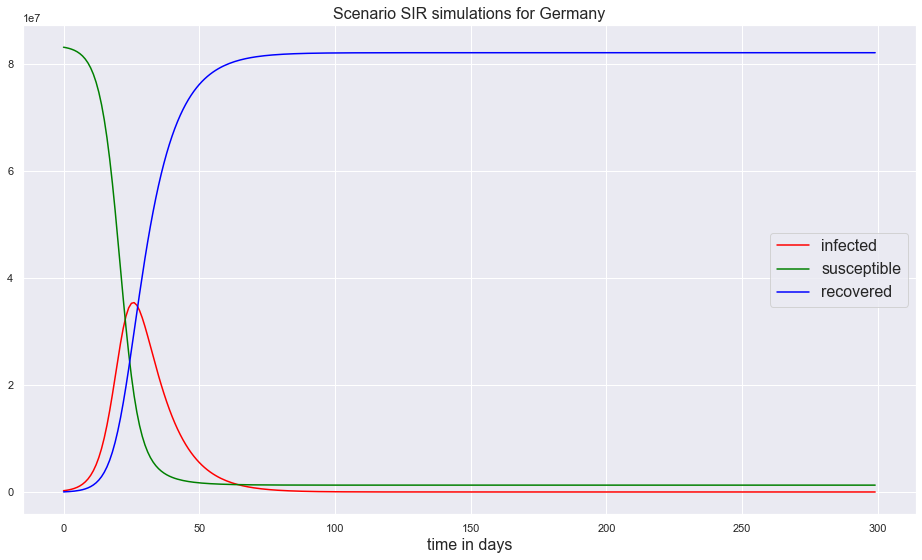

In [15]:
fig, ax1 = plt.subplots(1,1)

ax1.plot(propagation_rates.index, propagation_rates.infected, label = 'infected', color = 'red')
ax1.plot(propagation_rates.index, propagation_rates.susceptible, label = 'susceptible', color = 'green')
ax1.plot(propagation_rates.index, propagation_rates.recovered, label = 'recovered', color = 'blue')


ax1.set_yscale('linear')

ax1.set_title('Scenario SIR simulations for Germany', size = 16)
ax1.set_xlabel('time in days', size = 16)
ax1.legend(loc = 'best', prop={'size':16})

# End